In [1]:
from lsmulator import *
from workloads import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *
from bloom_assignments import *

# Optimization

In [2]:
zipfs = [ZipfWorkload(zipf_param=1.1),
         ZipfWorkload(zipf_param=1.25),
         ZipfWorkload(zipf_param=1.5)]

In [3]:
timedecs = [DiscoverDecayWorkload(creates=scipy.stats.poisson(10), updates=scipy.stats.poisson(8)),
            DiscoverDecayWorkload(creates=scipy.stats.poisson(5)),
            DiscoverDecayWorkload(decay_rate=scipy.stats.beta(10, 1)),
            DiscoverDecayWorkload(decay_rate=scipy.stats.beta(1, 1))]

In [4]:
robins = [RoundRobinWorkload()]

In [5]:
def optimize(workload, total_memory, assignment, dM=100):
  return LSMulator.cache_vs_bloom(workload, total_memory, dM=dM, balloc=assignment)

In [6]:
baseline_trees2 = optimize(zipfs[2], 1000, baseline_assignment)
monkey_trees2 = optimize(zipfs[2], 1000, monkey_assignment)

In [7]:
baseline_trees = optimize(zipfs[2], 10000, baseline_assignment)
monkey_trees = optimize(zipfs[2], 10000, monkey_assignment)

In [8]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.title(zipfs[2].__str__())
q = zipfs[2].queries
plt.scatter(range(len(q)), [qq[0]for qq in q], alpha=0.025)
plt.xlim(0, len(q))
plt.yscale('log')

plt.subplot(133)
plt.title('Disk accesses (10,000 mem)')
plt.plot([t.cache.size for t in baseline_trees], [sum(l.accesses for l in t.layers) for t in baseline_trees], label='Baseline')
plt.plot([t.cache.size for t in monkey_trees], [sum(l.accesses for l in t.layers) for t in monkey_trees], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.subplot(132)
plt.title('Disk Accesses (1,000 mem)')
plt.plot([t.cache.size for t in baseline_trees2], [sum(l.accesses for l in t.layers) for t in baseline_trees2], label='Baseline')
plt.plot([t.cache.size for t in monkey_trees2], [sum(l.accesses for l in t.layers) for t in monkey_trees2], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')
plt.show()

KeyboardInterrupt: 

In [14]:
baseline_dec_trees = optimize(timedecs[0], 10000, baseline_assignment)
monkey_dec_trees = optimize(timedecs[0], 10000, monkey_assignment)

In [8]:
baseline_dec_trees2 = optimize(timedecs[0], 1000, baseline_assignment)
monkey_dec_trees2 = optimize(timedecs[0], 1000, monkey_assignment)

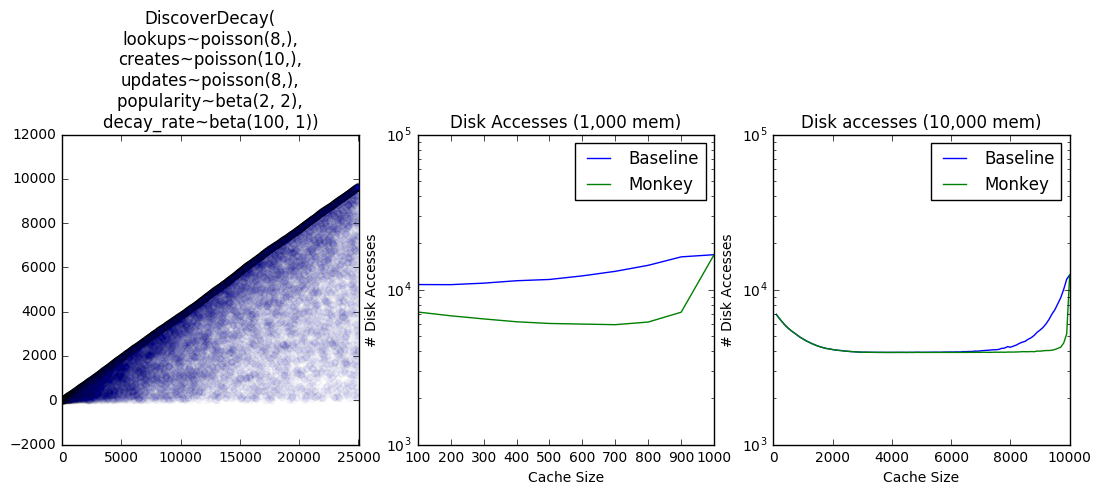

In [16]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.title(timedecs[0].__str__())
q = [qq[0] for qq in timedecs[0].queries]
plt.scatter(range(len(q)), q, alpha=0.025)
plt.xlim(0, len(q))

plt.subplot(133)
plt.title('Disk accesses (10,000 mem)')
plt.plot([t.cache.size for t in baseline_dec_trees], [t.disk_accesses for t in baseline_dec_trees], label='Baseline')
plt.plot([t.cache.size for t in monkey_dec_trees], [t.disk_accesses for t in monkey_dec_trees], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.subplot(132)
plt.title('Disk Accesses (1,000 mem)')
plt.plot([t.cache.size for t in baseline_dec_trees2], [t.disk_accesses for t in baseline_dec_trees2], label='Baseline')
plt.plot([t.cache.size for t in monkey_dec_trees2], [t.disk_accesses for t in monkey_dec_trees2], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.show()

In [13]:
baseline_rr_trees = optimize(robins[0], 10000, baseline_assignment)
monkey_rr_trees = optimize(robins[0], 10000, monkey_assignment)

In [11]:
baseline_rr_trees2 = optimize(robins[0], 1000, baseline_assignment)
monkey_rr_trees2 = optimize(robins[0], 1000, monkey_assignment)

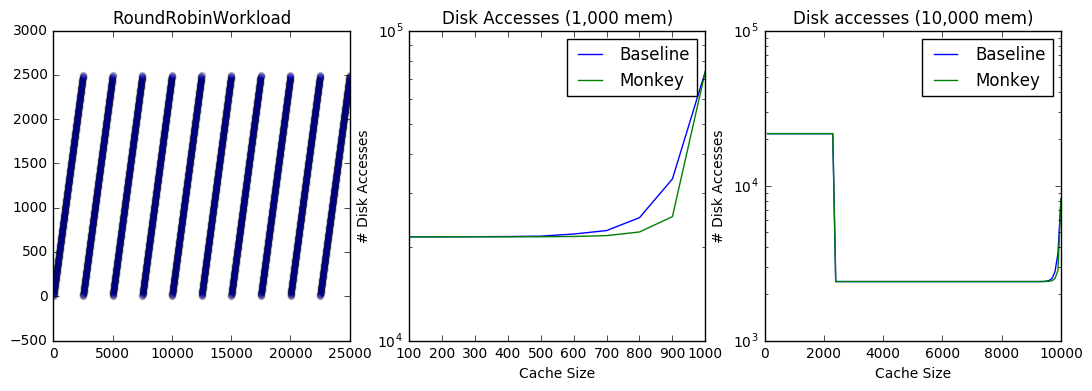

In [15]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.title(robins[0].__str__())
q = robins[0].queries
plt.scatter(range(len(q)), [qq[0]for qq in q], alpha=0.025)

plt.xlim(0, len(q))

plt.subplot(133)
plt.title('Disk accesses (10,000 mem)')
plt.plot([t.cache.size for t in baseline_rr_trees], [t.disk_accesses for t in baseline_rr_trees], label='Baseline')
plt.plot([t.cache.size for t in monkey_rr_trees], [t.disk_accesses for t in monkey_rr_trees], label='Monkey')
plt.legend()
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.subplot(132)
plt.title('Disk Accesses (1,000 mem)')
plt.plot([t.cache.size for t in baseline_rr_trees2], [t.disk_accesses for t in baseline_rr_trees2], label='Baseline')
plt.plot([t.cache.size for t in monkey_rr_trees2], [t.disk_accesses for t in monkey_rr_trees2], label='Monkey')
plt.legend(loc='best')
plt.xlabel('Cache Size')
plt.ylabel('# Disk Accesses')
plt.yscale('log')

plt.show()

In [44]:
%prun monkey_rr_trees3 = optimize(robins[0], 1000, monkey_assignment)

In [8]:
dec_trees_2d = LSMulator.cache_vs_bloom_vs_buf(timedecs[0], 1000, balloc=monkey_assignment,verbose=True)

Memtable = 100
Memtable = 200
Memtable = 300
Memtable = 400
Memtable = 500
Memtable = 600
Memtable = 700
Memtable = 800
Memtable = 900


In [9]:
dec_trees_2d_bl = LSMulator.cache_vs_bloom_vs_buf(timedecs[0], 1000, dM=100, balloc=baseline_assignment,verbose=True)

Memtable = 100
Memtable = 200
Memtable = 300
Memtable = 400
Memtable = 500
Memtable = 600
Memtable = 700
Memtable = 800
Memtable = 900


In [10]:
def xyz_comp(trees):
  vals = np.array([( t.memtbl.size, t.cache.size, t.disk_accesses) for t in trees])
  best = min([( t.disk_accesses, t.memtbl.size, t.cache.size) for t in trees])
  X,Y,Z = vals.T
  return X,Y,Z,best

<IPython.core.display.Javascript object>


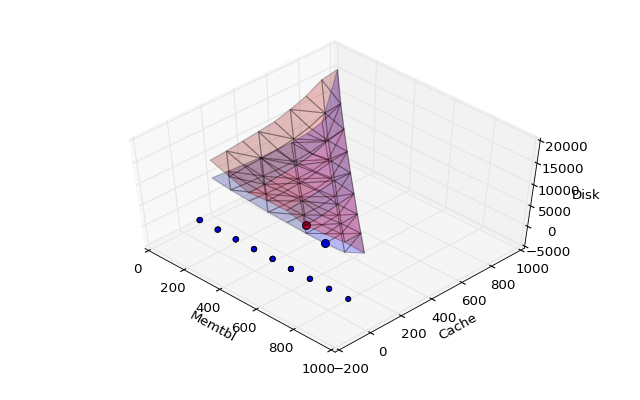

In [11]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
X1,Y1,Z1,b1 = xyz_comp(dec_trees_2d)
X2,Y2,Z2,b2 = xyz_comp(dec_trees_2d_bl)

plt.figure(figsize=(8,5))
plt.subplot(111, projection='3d')
plt.gca().plot_trisurf(X1,Y1,Z1, alpha=0.25, color='blue', label='Monkey')
plt.gca().plot_trisurf(X2,Y2,Z2, alpha=0.25, color='red', label='Baseline')

plt.xlabel('Memtbl')
plt.ylabel('Cache')
plt.gca().set_zlabel('Disk')
plt.scatter([b1[1]],[b1[2]],zs=[b1[0]], c='blue',s=50)
plt.scatter([b2[1]],[b2[2]],zs=[b2[0]], c='red',s=50)

plt.show()

In [21]:
[(t.memtbl.size, t.cache.size, t.cache.hits) for t in dec_trees_2d]

[(100, 900, 2313),
 (100, 800, 2176),
 (100, 700, 2008),
 (100, 600, 1829),
 (100, 500, 1643),
 (100, 400, 1405),
 (100, 300, 1117),
 (100, 200, 823),
 (100, 100, 471),
 (200, 800, 2049),
 (200, 700, 1898),
 (200, 600, 1725),
 (200, 500, 1551),
 (200, 400, 1322),
 (200, 300, 1057),
 (200, 200, 775),
 (200, 100, 429),
 (300, 700, 1794),
 (300, 600, 1617),
 (300, 500, 1461),
 (300, 400, 1242),
 (300, 300, 1000),
 (300, 200, 719),
 (300, 100, 408),
 (400, 600, 1551),
 (400, 500, 1396),
 (400, 400, 1187),
 (400, 300, 948),
 (400, 200, 679),
 (400, 100, 384),
 (500, 500, 1322),
 (500, 400, 1131),
 (500, 300, 916),
 (500, 200, 637),
 (500, 100, 359),
 (600, 400, 1104),
 (600, 300, 896),
 (600, 200, 644),
 (600, 100, 360),
 (700, 300, 865),
 (700, 200, 617),
 (700, 100, 345),
 (800, 200, 579),
 (800, 100, 321),
 (900, 100, 327)]

In [6]:
def compare_cache_improvements(queries, cs=50):
  t1 = LSMulator.emulate(queries, cache_size=cs)
  t2 = LSMulator.emulate(queries, cache_size=cs+1)
  return t1.disk_accesses - t2.disk_accesses, t1.cache.last_slot_hits * (t1.disk_accesses / t1.layer_queries)

In [7]:
results = np.array([compare_cache_improvements(zipfs[1].queries) for _ in range(20)])
results[:,0].mean(), results[:,1].mean()

(201.5, 218.43149990434284)

In [63]:
results2 = np.array([compare_cache_improvements(timedecs[1].queries) for _ in range(20)])
results2[:,0].mean(), results2[:,1].mean()

(43.299999999999997, 38.923687542201222)

In [68]:
results3 = np.array([compare_cache_improvements(robins[0].queries) for _ in range(5)])
results3[:,0].mean(), results3[:,1].mean()

(190.80000000000001, 0.0)

In [12]:
def compare_memtbl_improvements(queries, mt=100):
  t1 = LSMulator.emulate(queries, memtbl_size=mt)
  t2 = LSMulator.emulate(queries, memtbl_size=mt+1)
  T = t1.memtbl.ratio
  write_savings1 = (-np.log(mt / (mt + 1)) / np.log(T)) * len(set(queries[:,0])) 
  write_savings2 = (-np.log(mt / (mt + 1)) / np.log(T)) * t1.puts
  write_savings3 = (-np.log(mt / (mt + 1)) / np.log(T)) * (t1.puts-t1.dupes_squashed)
  read_savings = t1.memtbl.hit_indexes[mt-1]
  return t1.disk_accesses - t2.disk_accesses, read_savings, write_savings1, write_savings2, write_savings3

In [14]:
np.array([compare_memtbl_improvements(timedecs[1].queries) for _ in range(10)]).mean(axis=0)

array([ 197.4       ,  120.64188218])

In [12]:
np.array([compare_memtbl_improvements(timedecs[1].queries) for _ in range(10)]).mean(axis=0)

array([ 121.9       ,  168.31581016])

In [19]:
results4 = np.array([compare_memtbl_improvements(timedecs[1].queries) for _ in range(100)])

In [46]:
t1 = LSMulator.emulate(timedecs[1].queries, memtbl_size=100)
t2 = LSMulator.emulate(timedecs[1].queries, memtbl_size=200)

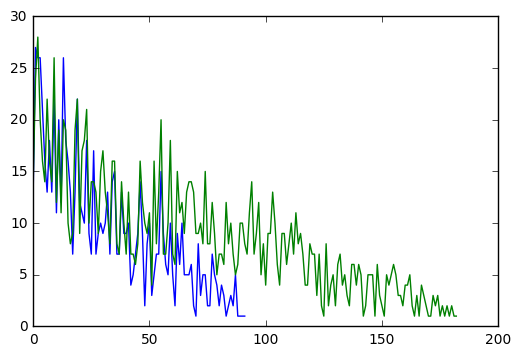

In [49]:
plt.plot(list(t1.memtbl.hit_indexes.values()))
plt.plot(list(t2.memtbl.hit_indexes.values()))

plt.show()

In [28]:
results4 = np.array([compare_memtbl_improvements(timedecs[1].queries) for _ in range(500)])

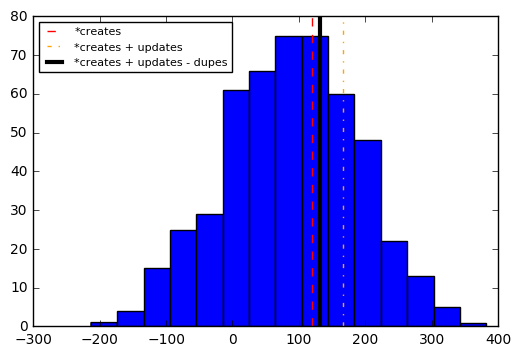

In [29]:
plt.hist(results4[:,0], bins=15)
plt.axvline(results4[0][2], color='red', ls='--', label='*creates')
plt.axvline(results4[0][3], color='orange', ls='-.', label='*creates + updates')
plt.axvline(results4[0][4], color='black', lw=3, label='*creates + updates - dupes')
plt.legend(loc='best', fontsize=8)
plt.show()

In [20]:
results5 = np.array([compare_memtbl_improvements(zipfs[1].queries) for _ in range(250)])

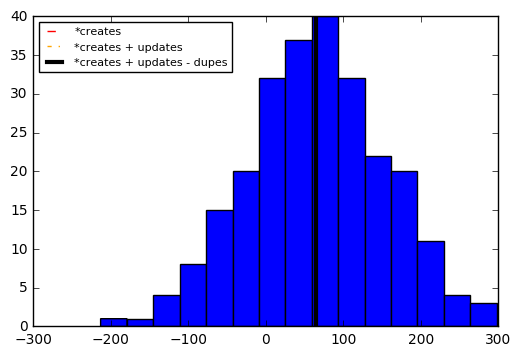

In [21]:
plt.hist(results5[:,0], bins=15)
plt.axvline(results5[0][2], color='red', ls='--', label='*creates')
plt.axvline(results5[0][3], color='orange', ls='-.', label='*creates + updates')
plt.axvline(results5[0][4], color='black', lw=3, label='*creates + updates - dupes')
plt.legend(loc='best', fontsize=8)
plt.show()

In [25]:

bigdisc = DiscoverDecayWorkload(n_queries=75000)

In [30]:
results6 = np.array([compare_memtbl_improvements(bigdisc.queries) for _ in range(500)])

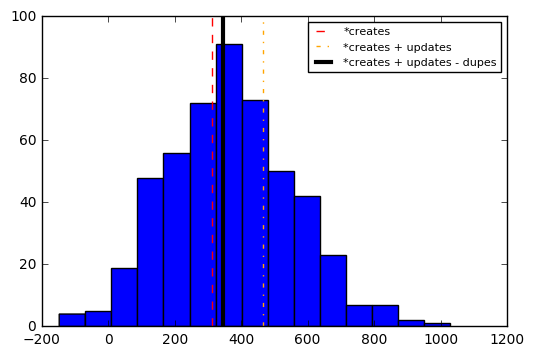

In [31]:
plt.hist(results6[:,0], bins=15)
plt.axvline(results6[0][2], color='red', ls='--', label='*creates')
plt.axvline(results6[0][3], color='orange', ls='-.', label='*creates + updates')
plt.axvline(results6[0][4], color='black', lw=3, label='*creates + updates - dupes')
plt.legend(loc='best', fontsize=8)
plt.show()

In [47]:
a = defaultdict(int)
a[1] += 1
a[2] += 5

sum(a.values())
0.5*np.exp(np.log(2))

1.0

In [5]:
def print_pred_vs_emp_bloom_fp(wl):
  t1 = LSMulator.emulate(wl.queries, memtbl_size=100)
  a1 = monkey_assignment(100, 100, t1.layer_sizes)
  a2 = np.array(a1)
  a2[1] += 256
  
  t1 = LSMulator.emulate(wl.queries, memtbl_size=100, bloom_size=a1)
  t2 = LSMulator.emulate(wl.queries, memtbl_size=100, bloom_size=a2)

  print('difference in accesses:', t1.disk_accesses - t2.disk_accesses)

  print('empirical FP 1:', t1.layers[1].bloom.false_positive_rate)
  print('predicted FP 1:', t1.layers[1].bloom.estimated_fp_rate())


  print('empirical FP 2:', t2.layers[1].bloom.false_positive_rate)
  print('predicted FP 2:', t2.layers[1].bloom.estimated_fp_rate())


In [5]:
t1 = LSMulator.emulate(timedecs[0].queries, memtbl_size=100)
ls = t1.layer_sizes
M = t1.memtbl.size
t1 = LSMulator.emulate(timedecs[0].queries, memtbl_size=M, bloom_size=monkey_assignment(100, M, ls))

In [6]:
monkey_assignment(100, M, ls)

array([1079, 1584, 2014, 1720,    0,    0,    0])

In [9]:
print('Cache:', t1.bigger_cache_savings())
print('Memtbl:', t1.bigger_memtbl_savings())
print('Bloom:', t1.bigger_bloom_savings())

Cache: 12.9704074339
Memtbl: 173.268386233
Bloom: 29.8540055568


In [21]:
t1.layers[2].bloom.estimated_fp_rate()

0.17047321551714537

In [8]:
print_pred_vs_emp_bloom_fp(timedecs[0])

difference in accesses: 139
empirical FP 1: 0.07396950875211744
predicted FP 1: 0.0779188725772
empirical FP 2: 0.059853190287972896
predicted FP 2: 0.0544570288797


In [9]:
print_pred_vs_emp_bloom_fp(timedecs[1])

difference in accesses: 166
empirical FP 1: 0.07500632431065014
predicted FP 1: 0.0766907601112
empirical FP 2: 0.051859347331140906
predicted FP 2: 0.0535607220793


In [10]:
print_pred_vs_emp_bloom_fp(timedecs[2])
print_pred_vs_emp_bloom_fp(zipfs[0])
print_pred_vs_emp_bloom_fp(zipfs[1])

difference in accesses: 85
empirical FP 1: 0.05984800506649778
predicted FP 1: 0.0599964500323
empirical FP 2: 0.031982267257758074
predicted FP 2: 0.0404161320565
difference in accesses: 64
empirical FP 1: 0.08698309227948665
predicted FP 1: 0.0842295933401
empirical FP 2: 0.05887146058260338
predicted FP 2: 0.0597072425023
difference in accesses: 21
empirical FP 1: 0.07760213508519812
predicted FP 1: 0.0857039497686
empirical FP 2: 0.06590022582631903
predicted FP 2: 0.0608508932743


In [16]:
unif = UniformWorkload(k_classes=1000)

print_pred_vs_emp_bloom_fp(unif)

difference in accesses: 292
empirical FP 1: 0.08389603181944316
predicted FP 1: 0.0758604738684
empirical FP 2: 0.04680418092683378
predicted FP 2: 0.0556590158743


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

173.65597914361646

In [ ]:
monkey_assignment(10000)

In [201]:
t1.layers[1].mergewrites

[200, 400, 200, 400]